# Affordable Housing in Nashville/Davidson County

First, import the pandas library with the alias pd:

In [1]:
import pandas as pd

Point pandas to the data file we want to import:

In [2]:
houses = pd.read_csv('data/2009SINGLEFAMILYSF.txt')

Inspect the first few rows:

In [3]:
houses.head(n=10)

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,FinishedArea
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.0
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.0
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.0
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.0
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.0
5,00200002400,GSD,10,226 EAST END RD,GOODLETTSVILLE,37072,41800.0,129800.0,171600.0,42900.0,1998.0
6,00200002401,GSD,10,231 EAST END RD,GOODLETTSVILLE,37072,28000.0,87800.0,115800.0,28950.0,2028.0
7,00200002700,RT,10,112 EAST END RD,GOODLETTSVILLE,37072,21000.0,119300.0,140300.0,35075.0,2627.0
8,00200003000001,RT,10,156 B EAST END RD,GOODLETTSVILLE,37072,37300.0,122600.0,159900.0,39975.0,1830.0
9,00200003100,RT,10,148 EAST END RD,GOODLETTSVILLE,37072,21000.0,14300.0,35300.0,8825.0,693.0


Adjust the column names. It is a lot easier to work with columns that do not have spaces or start with a number. We will use map with a lambda function to accomplish this.

**TODO:** explain this more in depth

In [4]:
houses.columns = houses.columns.map(lambda x: x.replace(' ', '').replace('2009', ''))

**TODO**: figure out what these district codes are

In [5]:
houses.DistrictCode.value_counts()

USD     115827
GSD      57361
GO        2569
FH        1861
OH        1782
BM        1113
CBID      1049
LW         880
GBID       799
BH         155
RT          10
Name: DistrictCode, dtype: int64

Let's look at the number of single family homes assessed in each district:

In [6]:
houses.CouncilDistrict.value_counts().sort_values()

32    2971
18    3295
30    3738
17    3826
27    4032
21    4076
14    4151
16    4271
28    4305
2     4342
20    4406
10    4431
5     4511
13    4722
9     4810
19    4998
6     5201
8     5280
3     5315
26    5433
29    5679
12    5745
1     5906
7     6144
23    6192
35    6234
22    6239
15    6378
31    6384
25    6461
34    6507
24    6737
4     6856
33    6895
11    6935
Name: CouncilDistrict, dtype: int64

Now, let's look at where these districts are located:

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
council_districts = gpd.read_file('data/Council_District_Outlines.geojson')

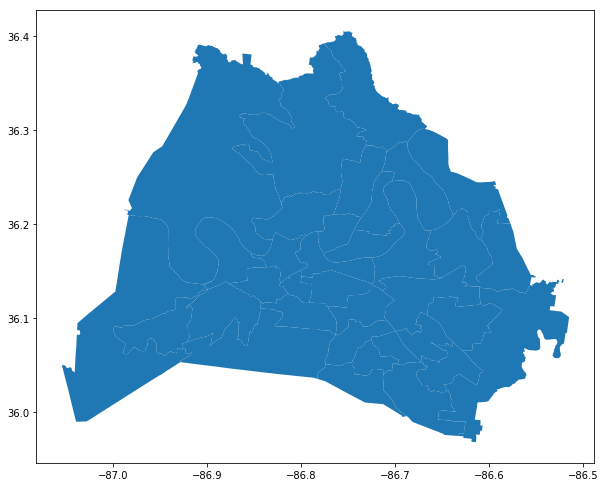

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax)

In [10]:
council_districts['coords'] = council_districts.geometry.apply(lambda x: x.representative_point().coords[:][0])

In [11]:
council_districts.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,"(-86.90970241884453, 36.26327799986527)"
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,"(-86.79713738920347, 36.209998499786956)"
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,"(-86.73924255649486, 36.24531199982642)"
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,"(-86.66879039599107, 36.24062099983553)"
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,(POLYGON ((-86.74488864807594 36.0531632050230...,"(-86.73590653419714, 36.02409350009242)"


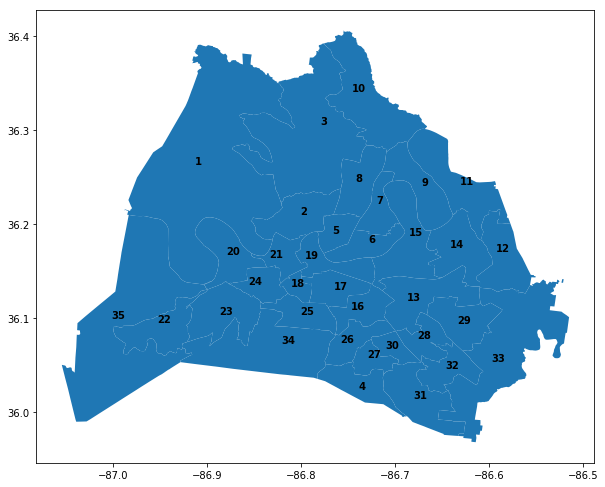

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax)
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

Link to more detailed map: http://maps.nashville.gov/webimages/MapGallery/PDFMaps/2018%20Council%20Members.pdf

In [13]:
homes_per_district = houses.CouncilDistrict.value_counts().sort_values()

In [14]:
homes_per_district = pd.DataFrame(homes_per_district)
homes_per_district.head(2)

,CouncilDistrict
32,2971
18,3295


In [15]:
homes_per_district = homes_per_district.reset_index()
homes_per_district.head(2)

,index,CouncilDistrict
0,32,2971
1,18,3295


In [16]:
homes_per_district.columns = ['district', 'num_homes']
homes_per_district.head(2)

,district,num_homes
0,32,2971
1,18,3295


In [17]:
pd.merge(left = council_districts, right = homes_per_district)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

We get an error. Pandas won't let us merge columns with different types. We can change the data type of the district column, which will allow us to merge the two dataframes.

In [18]:
council_districts.district = council_districts.district.astype(int)

In [19]:
council_districts = pd.merge(left = council_districts, right = homes_per_district)

In [20]:
type(council_districts)

geopandas.geodataframe.GeoDataFrame

When we call .plot() on a GeoDataFrame, we can create a choropleth by specifying column = <column_name>. Here, we will color by number of homes.

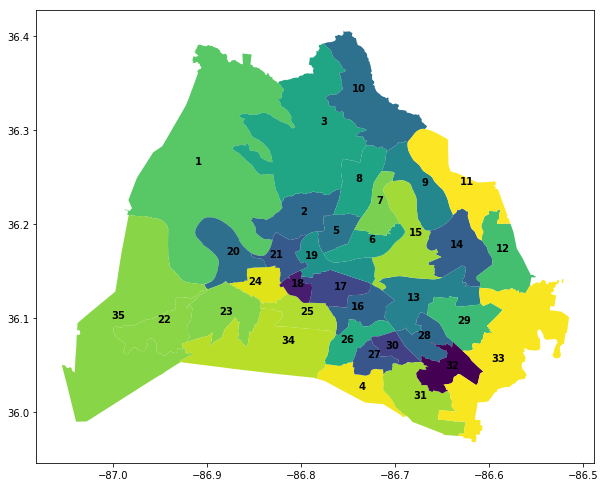

In [21]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax, column = 'num_homes')
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

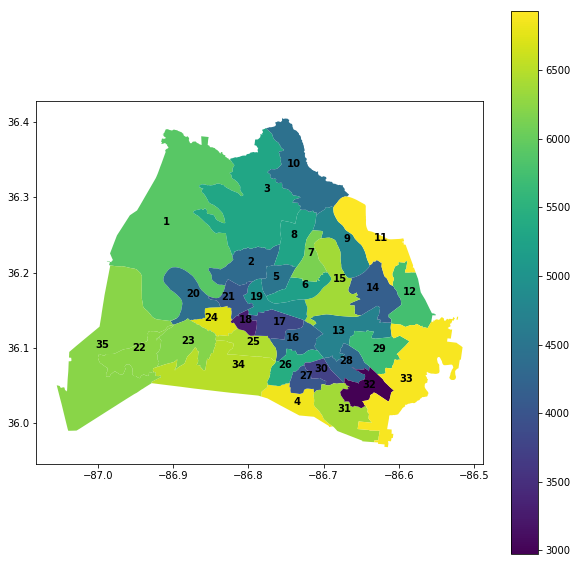

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax, column = 'num_homes', legend = True)
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

This colormap is not necessarily the best. We can speciy a different one using the cmap argument. See https://matplotlib.org/tutorials/colors/colormaps.html to see the colormap options. If you don't like any of those, it is also possible to create you own.

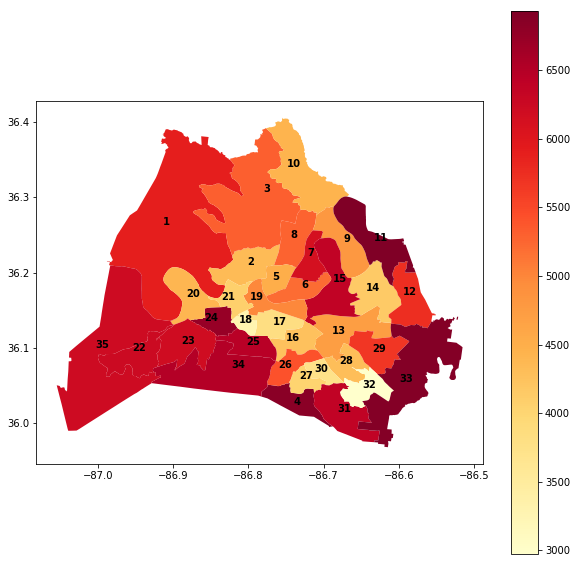

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax, column = 'num_homes', legend = True, cmap = 'YlOrRd')
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

In [24]:
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

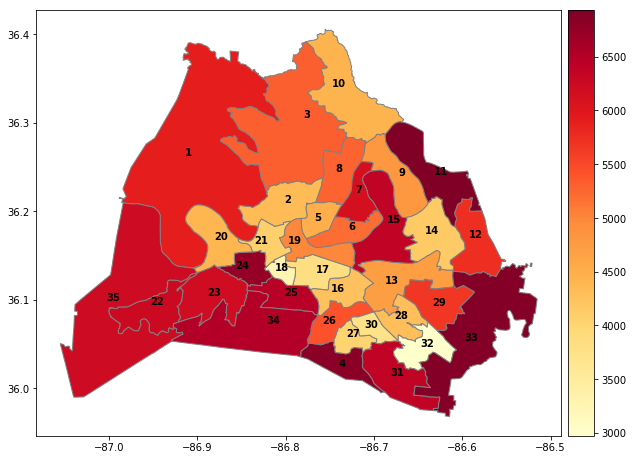

In [25]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = 'black')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes.min(), council_districts.num_homes.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

In [26]:
def choose_color(num_homes):
    if num_homes < 5000: return "black"
    return "white"

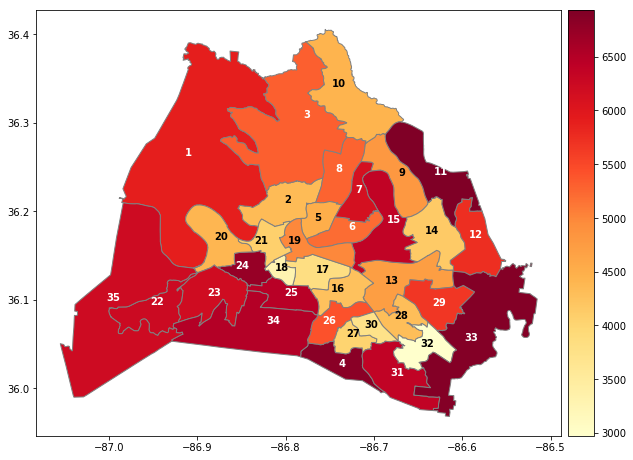

In [27]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes']))
                 #color = 'white')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes.min(), council_districts.num_homes.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

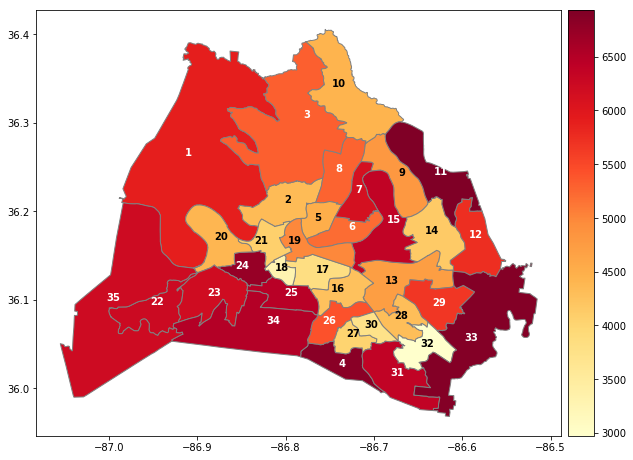

In [28]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes']))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes.min(), council_districts.num_homes.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

Notice how some of the labels are not really centered on the districts. We can adjust these with the help of a function.

In [29]:
def shift_coord(district, amount, direction):
    old_coord = council_districts.loc[council_districts.district == district, 'coords'].values[0]
    if direction == 'up':
        new_coord = (old_coord[0], old_coord[1] + amount)
    if direction == 'down':
        new_coord = (old_coord[0], old_coord[1] - amount)
    if direction == 'left':
        new_coord = (old_coord[0] - amount, old_coord[1])
    if direction == 'right':
        new_coord = (old_coord[0] + amount, old_coord[1])
    council_districts.loc[council_districts.district == district, 'lng'] = new_coord[0]
    council_districts.loc[council_districts.district == district, 'lat'] = new_coord[1]

    council_districts.loc[council_districts.district == district, 'coords'] = council_districts.loc[council_districts.district == district, ['lng', 'lat']].apply(tuple, axis = 1) 

In [30]:
shift_coord(district=15, amount = 0.005, direction = 'left')
shift_coord(district=9, amount = 0.005, direction = 'down')
shift_coord(district=15, amount = 0.02, direction = 'down')
shift_coord(district=28, amount = 0.003, direction = 'down')
shift_coord(district=6, amount = 0.005, direction = 'down')
shift_coord(district=27, amount = 0.004, direction = 'left')
shift_coord(district=27, amount = 0.005, direction = 'down')
shift_coord(district=11, amount = 0.01, direction = 'down')
shift_coord(district=18, amount = 0.005, direction = 'down')
shift_coord(district=22, amount = 0.01, direction = 'down')
shift_coord(district=25, amount = 0.006, direction = 'down')
shift_coord(district=21, amount = 0.005, direction = 'right')
shift_coord(district=24, amount = 0.005, direction = 'right')
shift_coord(district=3, amount = 0.01, direction = 'down')
shift_coord(district=3, amount = 0.005, direction = 'left')
shift_coord(district=7, amount = 0.015, direction = 'down')

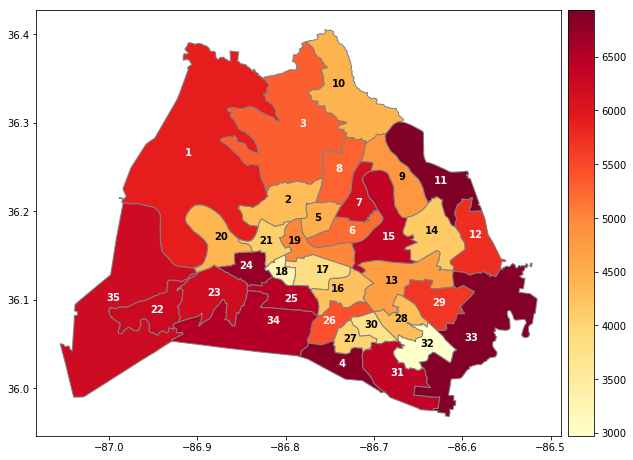

In [31]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes']))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes.min(), council_districts.num_homes.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

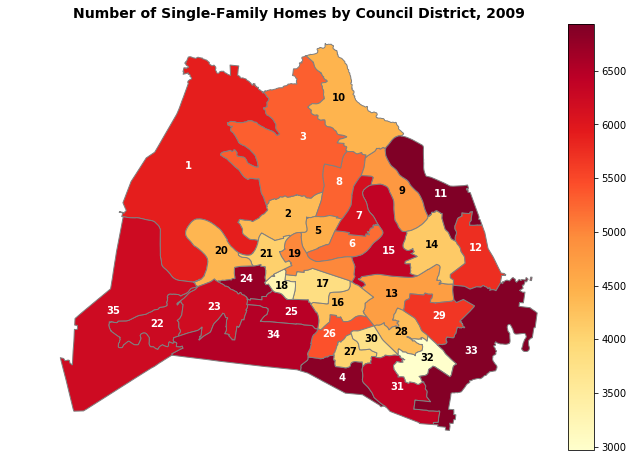

In [32]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes']))

plt.title('Number of Single-Family Homes by Council District, 2009', fontweight = 'bold', fontsize = 14)
plt.axis('off')
    
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes.min(), council_districts.num_homes.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

What if we want to see how this changes over time?

In [33]:
houses_2013 = pd.read_csv('data/2013SINGLEFAMILYSF.txt')
houses_2017 = pd.read_csv('data/2017SINGLEFAMILYSF.txt')

In [35]:
houses_2013.columns = houses_2013.columns.map(lambda x: x.replace(' ', '').replace('2013', ''))
houses_2017.columns = houses_2017.columns.map(lambda x: x.replace(' ', '').replace('2017', ''))

In [36]:
homes_per_district_2013 = pd.DataFrame(houses_2013.CouncilDistrict.value_counts().sort_values()).reset_index()
homes_per_district_2013.columns = ['district', 'num_homes_2013']

homes_per_district_2017 = pd.DataFrame(houses_2017.CouncilDistrict.value_counts().sort_values()).reset_index()
homes_per_district_2017.columns = ['district', 'num_homes_2017']

In [39]:
council_districts = council_districts.rename(columns = {'num_homes' : 'num_homes_2009'})
council_districts.head(1)

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords,num_homes_2009,lng,lat
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,"(-86.90970241884453, 36.26327799986527)",5906,NaN,NaN


In [42]:
council_districts = pd.merge(left = pd.merge(left = council_districts, right = homes_per_district_2013), right = homes_per_district_2017)

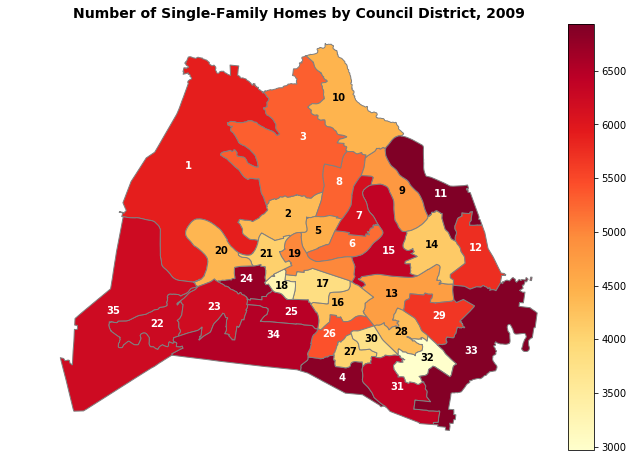

In [46]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes_2009', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes_2009']))

plt.title('Number of Single-Family Homes by Council District, 2009', fontweight = 'bold', fontsize = 14)
plt.axis('off')
    
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes_2009.min(), council_districts.num_homes_2009.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

In [51]:
council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.min()
council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.max()

8101

In [52]:
from ipywidgets import interact

In [57]:
@interact(year = ['2009', '2013', '2017'])
def generate_map(year):
    fig, ax = plt.subplots(figsize = (10,10))
    column = 'num_homes_' + year
    

    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey')

    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column]))

    plt.title(f'Number of Single-Family Homes by Council District, {year}', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(council_districts[column].min(), council_districts[column].max()), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='year', options=('2009', '2013', '2017'), value='2009'), Output()),…

This is pretty good, but notice how the colorscale changes across years. To make it easier to compare, it would be useful to have a fixed colorscale. To accomplish this, we can add the vmin and vmax arguments. Also, we need to redefine our choose_color function to accomodate the expanded colorscale.

In [60]:
def choose_color(num_homes):
    if num_homes < 5500: return "black"
    return "white"

In [61]:
vmin = council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.min()
vmax = council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.max()

@interact(year = ['2009', '2013', '2017'])
def generate_map(year):
    fig, ax = plt.subplots(figsize = (10,10))
    column = 'num_homes_' + year
    

    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey', vmin = vmin, vmax = vmax)

    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column]))

    plt.title(f'Number of Single-Family Homes by Council District, {year}', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(vmin, vmax), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='year', options=('2009', '2013', '2017'), value='2009'), Output()),…

## Adding Interstates

In [98]:
#downloaded from https://catalog.data.gov/dataset/tiger-line-shapefile-2016-nation-u-s-primary-roads-national-shapefile/resource/94e763bb-78a9-48bb-8759-2c5c98508636
interstates = gpd.read_file('data/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')

In [99]:
interstates.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,1105647111403,Morgan Branch Dr,M,S1100,"LINESTRING (-75.61562299999999 38.625174, -75...."
1,1103662626368,Biddle Pike,M,S1100,"LINESTRING (-84.56701699999999 38.360526, -84...."
2,1103662626717,Cincinnati Pike,M,S1100,"LINESTRING (-84.568051 38.348926, -84.56800899..."
3,1105056901124,I- 405,I,S1100,"LINESTRING (-122.679601 45.54082199999999, -12..."
4,1105056901128,I- 405,I,S1100,"LINESTRING (-122.670959 45.506849, -122.671025..."


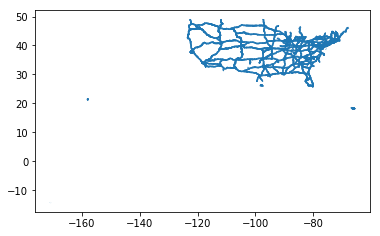

In [100]:
interstates.plot()

**TODO**: Make sure the following step is legit or whether I need to do a "conversion"

In [101]:
print(interstates.crs)
print(council_districts.crs)
interstates.crs = council_districts.crs

{'init': 'epsg:4269'}
{'init': 'epsg:4326'}


In [102]:
interstates = gpd.sjoin(interstates, council_districts, how="inner", op='intersects')

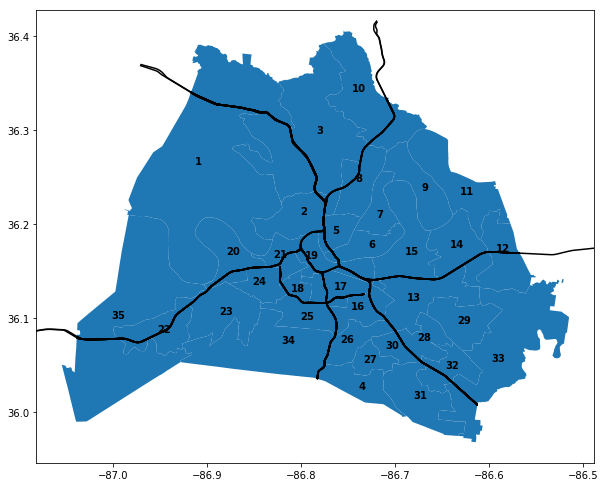

In [103]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax)
xlims = plt.xlim()
ylims = plt.ylim()
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')
interstates.plot(color = 'black', ax = ax)
plt.xlim(xlims)
plt.ylim(ylims);

In [104]:
vmin = council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.min()
vmax = council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.max()

@interact(year = ['2009', '2013', '2017'])
def generate_map(year):
    fig, ax = plt.subplots(figsize = (10,10))
    column = 'num_homes_' + year
    

    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey', vmin = vmin, vmax = vmax)

    xlims = plt.xlim()
    ylims = plt.ylim()
    
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column]))

    plt.title(f'Number of Single-Family Homes by Council District, {year}', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(vmin, vmax), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='year', options=('2009', '2013', '2017'), value='2009'), Output()),…

## Looking at changes in single-family housing
First from the assessment data, then from building and demolition permits.

In [105]:
council_districts.head(1)

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords,num_homes_2009,lng,lat,num_homes_2013,num_homes_2017
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,"(-86.90970241884453, 36.26327799986527)",5906,NaN,NaN,5955,6052


In [106]:
council_districts['absolute_change'] = council_districts.num_homes_2017 - council_districts.num_homes_2009

In [108]:
council_districts[['district', 'absolute_change']].sort_values('absolute_change').head()

,district,absolute_change
5,13,-12
11,26,4
2,8,13
27,30,43
8,16,47


In [109]:
council_districts[['district', 'absolute_change']].sort_values('absolute_change', ascending = False).head()

,district,absolute_change
28,31,1666
32,33,1206
17,17,1113
6,14,881
29,32,823


In [111]:
council_districts['relative_change'] = 100 * council_districts.absolute_change / council_districts.num_homes_2009

In [112]:
council_districts[['district', 'relative_change']].sort_values('relative_change', ascending = False).head()

,district,relative_change
17,17,29.090434
29,32,27.701111
28,31,26.096491
6,14,21.223801
32,33,17.490935


In [ ]:
def choose_color(type):
    if

In [118]:
@interact(type = ['absolute', 'relative'])
def generate_map(type):
    fig, ax = plt.subplots(figsize = (10,10))
    column = type + '_change'
    
    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey')

    xlims = plt.xlim()
    ylims = plt.ylim()
    
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column]))

    plt.title(type[0].upper() + type[1:] + ' Change in Number of Single-Family Homes, 2009-2017', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    vmin = council_districts[column].min()
    vmax = council_districts[column].max()

    cmap = cm.ScalarMappable(
          norm = Normalize(vmin, vmax), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='type', options=('absolute', 'relative'), value='absolute'), Output…

### Looking at Permits

Obtained from https://data.nashville.gov/Licenses-Permits/Building-Permits-Issued/3h5w-q8b7

In [143]:
permits = pd.read_csv('data/Building_Permits_Issued.csv')

/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [144]:
permits.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Const. Cost', 'Address',
       'City', 'State', 'Zip', 'Subdivision/Lot', 'Contact', 'Permit Type',
       'Permit Subtype', 'IVR Trk#', 'Purpose', 'Council Dist', 'Census Tract',
       'Mapped Location'],
      dtype='object')

In [145]:
permits['Permit Type Description'].unique()

array(['Building Residential - Addition', 'Building Residential - Rehab',
       'Building Use & Occupancy', 'Building Commercial - New',
       'Building Commercial - Rehab', 'Building Demolition Permit',
       'Building Residential - New', 'Building Sign Permit',
       'Building Residential - Amend Permit',
       'Building Residential - Roofing / Siding',
       'Building Commercial - Addition',
       'Building Commercial - Tenant Finish Out',
       'Building Commercial - Structural Frame',
       'Building Tree Removal Permit',
       'Building Commercial - Fire Damage', 'Building Commercial - Shell',
       'Building Commercial - Roofing / Siding',
       'Building Residential - Fire Damage',
       'Building Commercial - Foundation',
       'Building Residential - Change Contractor',
       'Building Moving Permit',
       'Building Residential - Tenant Finish Out',
       'Building Residential - Foundation',
       'Building Residential - Storm Damage', 'Building Blasting Pe

In [147]:
permits.loc[permits['Permit Type Description'] == 'Building Demolition Permit']['Permit Subtype Description'].unique()

array(['Demolition Permit - Commercial',
       'Demolition Permit - Residential',
       'Demo Permit - Residential Accessory', 'Single Family Residence',
       'Multifamily, Apt / Twnhome > 5 Unit Bldg'], dtype=object)

In [149]:
res_demo = permits.loc[permits['Permit Subtype Description'] == 'Demolition Permit - Residential']

In [151]:
res_demo.head(1)

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Const. Cost,Address,City,State,Zip,Subdivision/Lot,Contact,Permit Type,Permit Subtype,IVR Trk#,Purpose,Council Dist,Census Tract,Mapped Location
28,2019035697,Building Demolition Permit,Demolition Permit - Residential,08115015200,06/17/2019,07/03/2019,4500.0,1826 KNOWLES ST,NASHVILLE,TN,37208,"PT LOT 39 J M, T J & G W HARDING ADDITION",EASTEND CONTRACTING LLC,CADM,CAZ01A001,3681631,to demolish existing single family residence. ...,21.0,37013900.0,"1826 KNOWLES ST\nNASHVILLE, TN 37208\n(36.1720..."


In [164]:
council_districts = pd.merge(council_districts, res_demo['Council Dist'].value_counts().reset_index().rename(columns = {'index': 'district', 'Council Dist': 'num_demo'}))

In [154]:
permits.loc[permits['Permit Type Description'] == 'Building Residential - New']['Permit Subtype Description'].unique()

array(['Accessory Structure, Garage', 'Multifamily, Townhome',
       'Single Family Residence', 'Accessory Structure, Carport',
       'Detached Accessory Dwelling Unit',
       'Multifamily, Tri-Plex, Quad, Apartments',
       'Accessory Structure, Shed / Storage Bldg', 'Duplex',
       'Mobile Home Dwelling', 'Multifamily, Condominium 3&4 Unit Bldg',
       'Multifamily, Apt / Twnhome > 5 Unit Bldg', 'Accessory Apartment',
       'Master Permit Application',
       'Multifamily, Condominium > 5 Unit Bldg',
       'Leasing / Sales Office, Other', 'Accessory Structure, Pools',
       'Home Occupation, Single Family Residence',
       'General Office, Professional Services'], dtype=object)

In [155]:
res_new = permits.loc[(permits['Permit Subtype Description'] == 'Single Family Residence') & (permits['Permit Type Description'] == 'Building Residential - New')]

In [166]:
council_districts = pd.merge(council_districts, res_new['Council Dist'].value_counts().reset_index().rename(columns = {'index': 'district', 'Council Dist': 'num_permits'}))

In [170]:
@interact(type = ['demolition', 'new'])
def generate_map(type):
    fig, ax = plt.subplots(figsize = (10,10))
    if type == 'demolition' : 
        column = 'num_demo'
        title = 'Demolition Permits Issued, 2016-2019'
    else: 
        column = 'num_permits'
        title = 'Construction Permits Issued, 2016-2019'
    
    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey')

    xlims = plt.xlim()
    ylims = plt.ylim()
    
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column]))

    plt.title(title, fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    vmin = council_districts[column].min()
    vmax = council_districts[column].max()

    cmap = cm.ScalarMappable(
          norm = Normalize(vmin, vmax), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='type', options=('demolition', 'new'), value='demolition'), Output(…